In [1]:
import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Data set Link [Here](https://archive.ics.uci.edu/ml/datasets/Student+Performance)


In [3]:
math_df = pd.read_csv('/content/student-mat.csv')
por_df = pd.read_csv('/content/student-por.csv')

In [4]:
math_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [5]:
por_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [6]:
por_df.shape

(649, 33)

In [7]:
math_df.shape  

(395, 33)

# Checking the Null Values

In [8]:
math_df.dropna().shape

(395, 33)

No Nulls values for maths

In [9]:
por_df.dropna().shape

(649, 33)

Similarly, No null value for portuguese either

# Checking for Duplicates

In [10]:
por_df=por_df.drop_duplicates(subset=None, keep='first', inplace=False)
por_df.shape

(649, 33)

No duplicates in portuguese

In [11]:
math_df=math_df.drop_duplicates(subset=None, keep='first', inplace=False)
math_df.shape

(395, 33)

No duplicates in Maths either

# Merging the Datasets

In [12]:
math_df['subject']='Maths'

In [13]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Maths
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Maths
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Maths


In [14]:
por_df['subject']='Portuguese'

In [15]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese


In [16]:
train_df = pd.concat([por_df, math_df], axis=0)

In [17]:
train_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,Maths
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,Maths
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,Maths
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,Maths


In [18]:
train_df.to_csv('Merged_DF.csv', index =False)

In [19]:
df = pd.read_csv('Merged_DF.csv')

# Corelation Plot

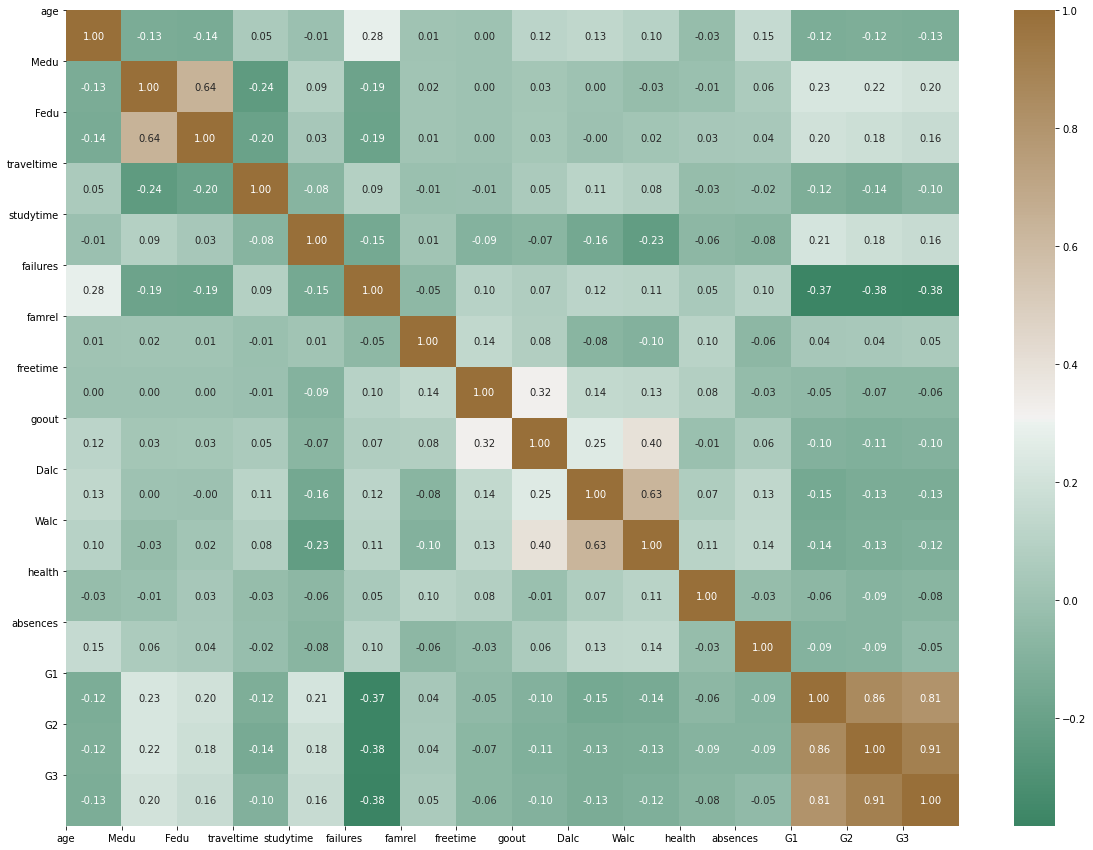

In [20]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
colormap = sns.diverging_palette(150,50, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Exploratory Data Analysis

# Uni-Variate Analysis

Text(0.5, 1.0, 'School Distribution')

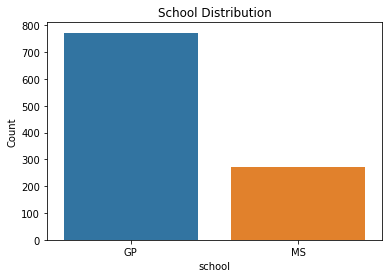

In [21]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'school', data=df)
ax = ax.set(ylabel="Count", xlabel="school")
figure.grid(False)
plt.title('School Distribution')

Text(0.5, 1.0, 'Gender Distribution')

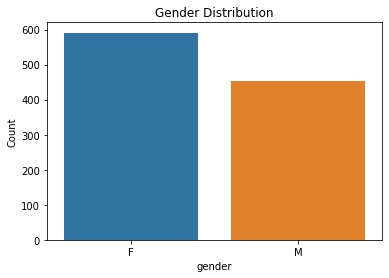

In [22]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'sex', data=df)
ax = ax.set(ylabel="Count", xlabel="gender")
figure.grid(False)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Age Distribution')

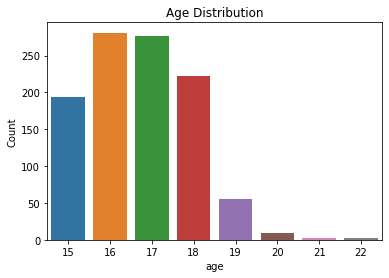

In [23]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'age', data=df)
ax = ax.set(ylabel="Count", xlabel="age")
figure.grid(False)
plt.title('Age Distribution')

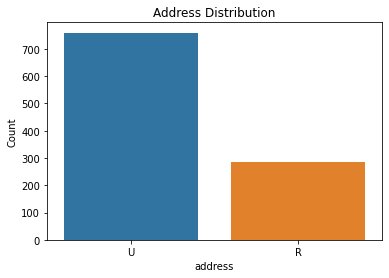

In [24]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'address', data=df)
ax = ax.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')
plt.savefig('address_plot.png', bbox_inches='tight')

Text(0.5, 1.0, 'Family Distribution')

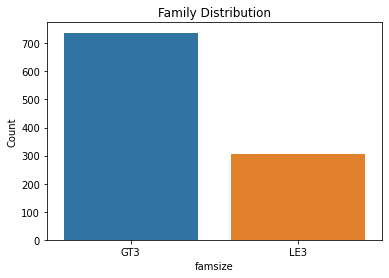

In [25]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsize', data=df)
ax = ax.set(ylabel="Count", xlabel="famsize")
figure.grid(False)
plt.title('Family Distribution')

Text(0.5, 1.0, 'Parents status Distribution')

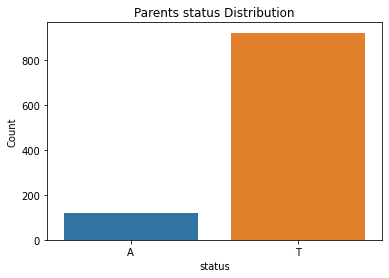

In [26]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Pstatus', data=df)
ax = ax.set(ylabel="Count", xlabel="status")
figure.grid(False)
plt.title('Parents status Distribution')

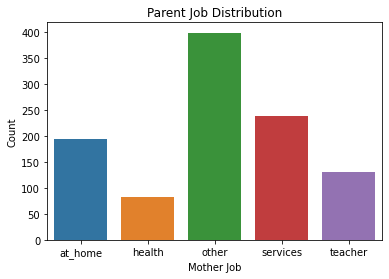

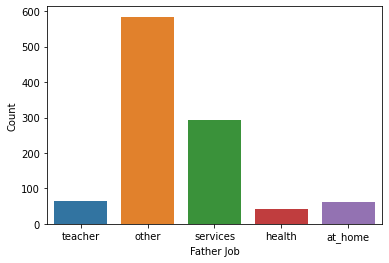

In [27]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=df)
ax = ax.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)
plt.title('Parent Job Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=df)
ax = ax.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)

Text(0.5, 1.0, 'Reason Distribution')

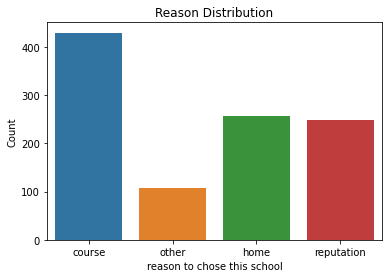

In [28]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'reason', data=df)
ax = ax.set(ylabel="Count", xlabel="reason to chose this school")
figure.grid(False)
plt.title('Reason Distribution')

Text(0.5, 1.0, 'Guardian Distribution')

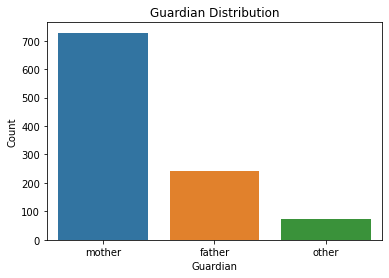

In [29]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'guardian', data=df)
ax = ax.set(ylabel="Count", xlabel="Guardian")
figure.grid(False)
plt.title('Guardian Distribution')

Text(0.5, 1.0, 'Travel Time Distribution')

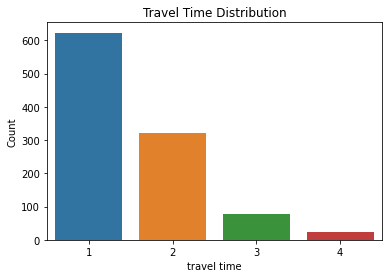

In [30]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'traveltime', data=df)
ax = ax.set(ylabel="Count", xlabel="travel time")
figure.grid(False)
plt.title('Travel Time Distribution')

Text(0.5, 1.0, 'Study Time Distribution')

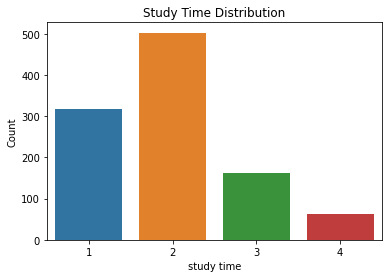

In [31]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'studytime', data=df)
ax = ax.set(ylabel="Count", xlabel="study time")
figure.grid(False)
plt.title('Study Time Distribution')

Text(0.5, 1.0, 'failures Distribution')

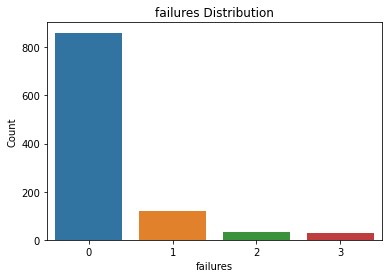

In [32]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=df)
ax = ax.set(ylabel="Count", xlabel="failures")
figure.grid(False)
plt.title('failures Distribution')

Text(0.5, 1.0, 'School Support Distribution')

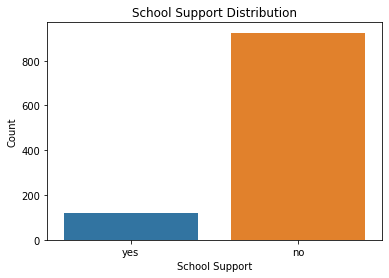

In [33]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'schoolsup', data=df)
ax = ax.set(ylabel="Count", xlabel="School Support")
figure.grid(False)
plt.title('School Support Distribution')

Text(0.5, 1.0, 'Family Support Distribution')

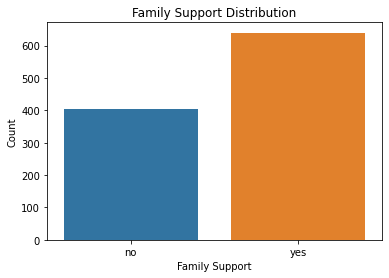

In [34]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsup', data=df)
ax = ax.set(ylabel="Count", xlabel="Family Support")
figure.grid(False)
plt.title('Family Support Distribution')

Text(0.5, 1.0, 'Extra paid classes Distribution')

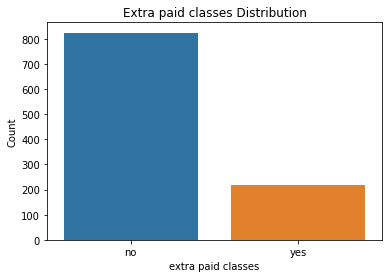

In [35]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'paid', data=df)
ax = ax.set(ylabel="Count", xlabel="extra paid classes")
figure.grid(False)
plt.title('Extra paid classes Distribution')

Text(0.5, 1.0, 'extra-curricular activities Distribution')

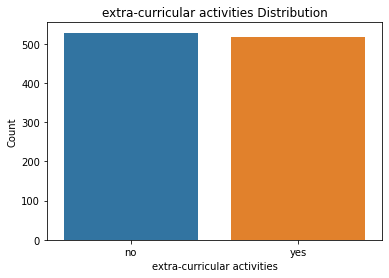

In [36]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'activities', data=df)
ax = ax.set(ylabel="Count", xlabel="extra-curricular activities")
figure.grid(False)
plt.title('extra-curricular activities Distribution')

Text(0.5, 1.0, 'attended nursery Distribution')

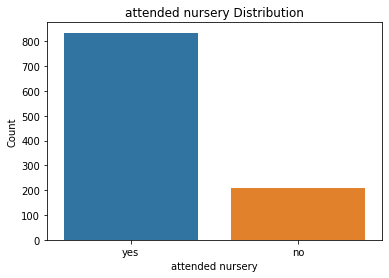

In [37]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'nursery', data=df)
ax = ax.set(ylabel="Count", xlabel="attended nursery")
figure.grid(False)
plt.title('attended nursery Distribution')

Text(0.5, 1.0, 'Students who want to take higher education Distribution')

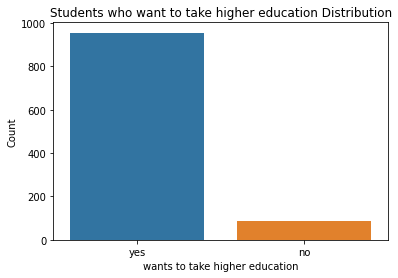

In [38]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'higher', data=df)
ax = ax.set(ylabel="Count", xlabel="wants to take higher education")
figure.grid(False)
plt.title('Students who want to take higher education Distribution')

Text(0.5, 1.0, 'Internet access at home Distribution')

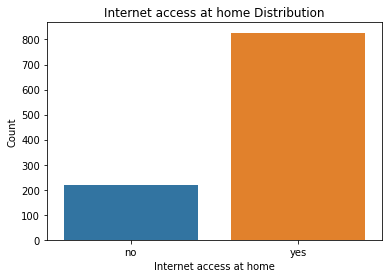

In [39]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'internet', data=df)
ax = ax.set(ylabel="Count", xlabel="Internet access at home")
figure.grid(False)
plt.title('Internet access at home Distribution')

Text(0.5, 1.0, 'Students with a romantic relationship Distribution')

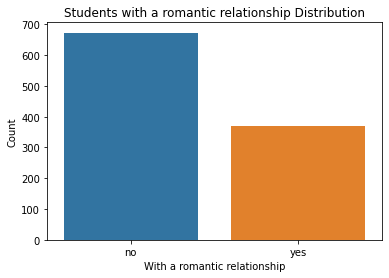

In [40]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'romantic', data=df)
ax = ax.set(ylabel="Count", xlabel="With a romantic relationship")
figure.grid(False)
plt.title('Students with a romantic relationship Distribution')

Text(0.5, 1.0, 'family relationship Distribution')

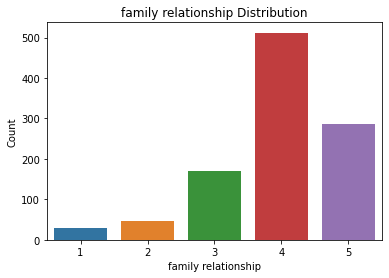

In [41]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famrel', data=df)
ax = ax.set(ylabel="Count", xlabel="family relationship")
figure.grid(False)
plt.title('family relationship Distribution')

Text(0.5, 1.0, 'Free time Distribution')

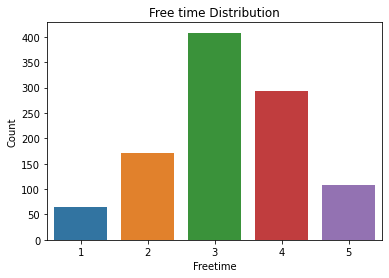

In [42]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'freetime', data=df)
ax = ax.set(ylabel="Count", xlabel="Freetime")
figure.grid(False)
plt.title('Free time Distribution')

Text(0.5, 1.0, 'Going Out Distribution')

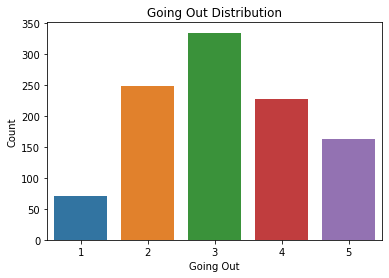

In [43]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'goout', data=df)
ax = ax.set(ylabel="Count", xlabel="Going Out")
figure.grid(False)
plt.title('Going Out Distribution')

Text(0.5, 1.0, 'Going Out Distribution')

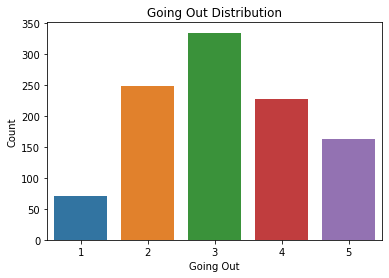

In [44]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'goout', data=df)
ax = ax.set(ylabel="Count", xlabel="Going Out")
figure.grid(False)
plt.title('Going Out Distribution')

Text(0.5, 1.0, 'Weekend alcohol consumption Distribution')

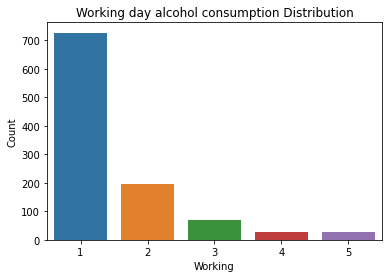

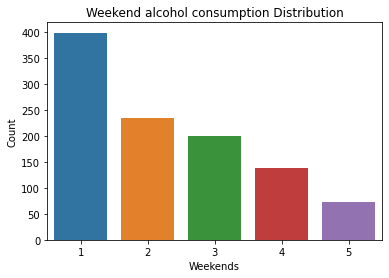

In [45]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Dalc', data=df)
ax = ax.set(ylabel="Count", xlabel="Working")
figure.grid(False)
plt.title('Working day alcohol consumption Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Walc', data=df)
ax = ax.set(ylabel="Count", xlabel="Weekends")
figure.grid(False)
plt.title('Weekend alcohol consumption Distribution')

# Bi-Variate Analysis

Transforming the Target Column for EDA

In [46]:
data = pd.read_csv('/content/Merged_DF.csv')
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,Satisfactory


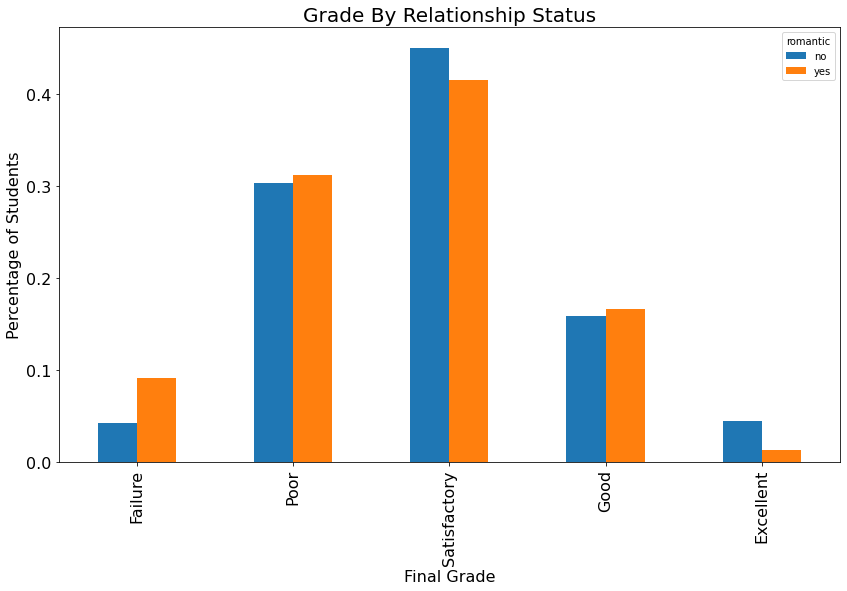

In [47]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.romantic)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Relationship Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

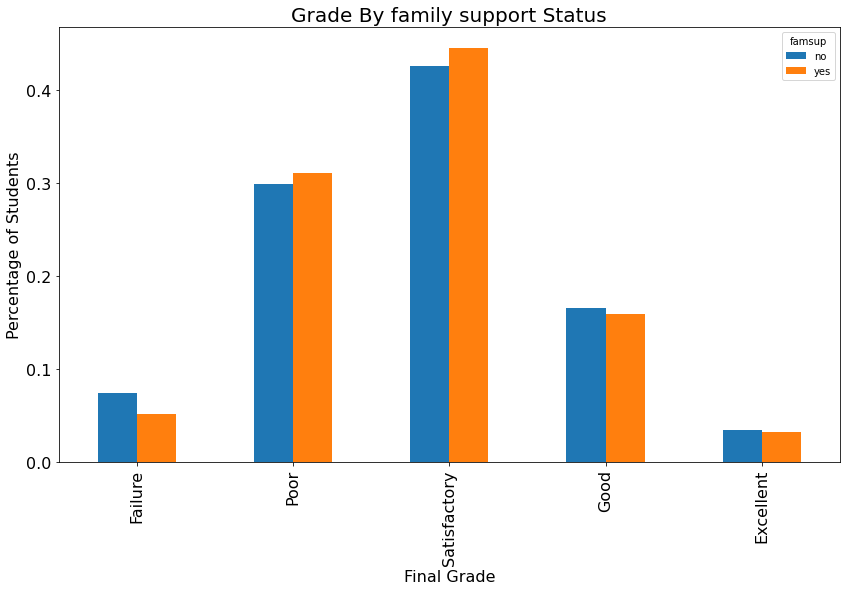

In [48]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.famsup)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By family support Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

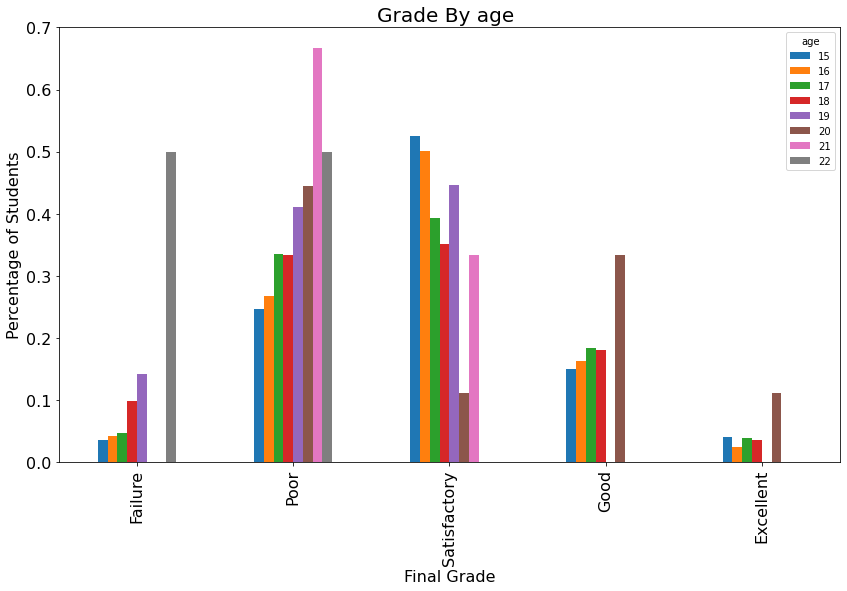

In [49]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.age)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By age ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

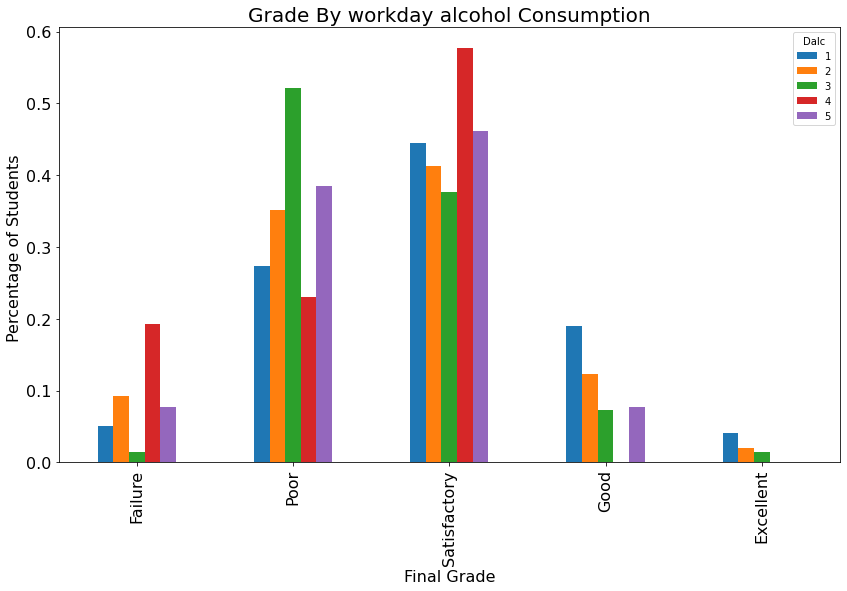

In [50]:
# Dalc - workday alcohol consumption
alcohol_index = pd.crosstab(index=data.FinalGrade, columns=data.Dalc)
workday_alcohol_index = alcohol_index.apply(perc).reindex(index)
workday_alcohol_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By workday alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

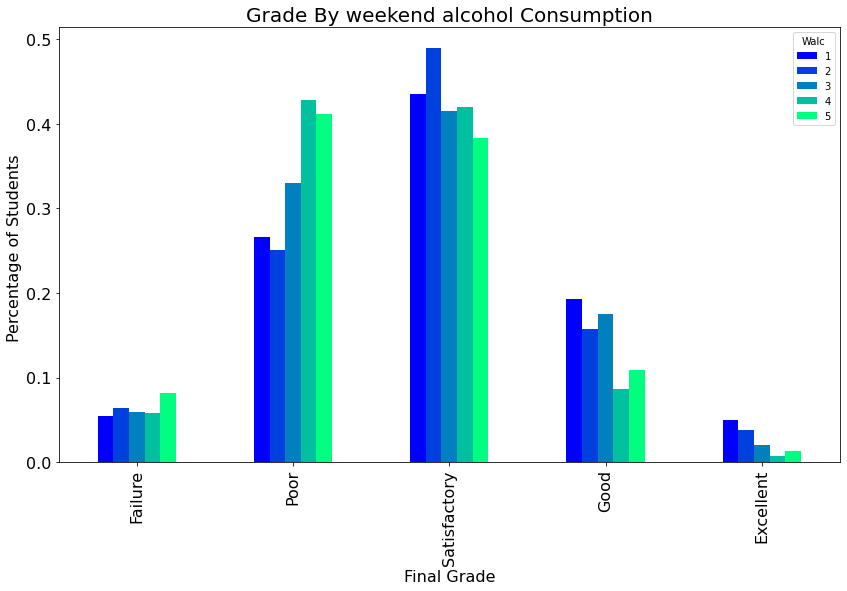

In [51]:
# Walc - weekday alcohol consumption
alcohol_index = pd.crosstab(index=data.FinalGrade, columns=data.Walc)
weekend_alcohol_index = alcohol_index.apply(perc).reindex(index)

weekend_alcohol_index.plot.bar(colormap='winter',fontsize=16, figsize=(14,8))
plt.title('Grade By weekend alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

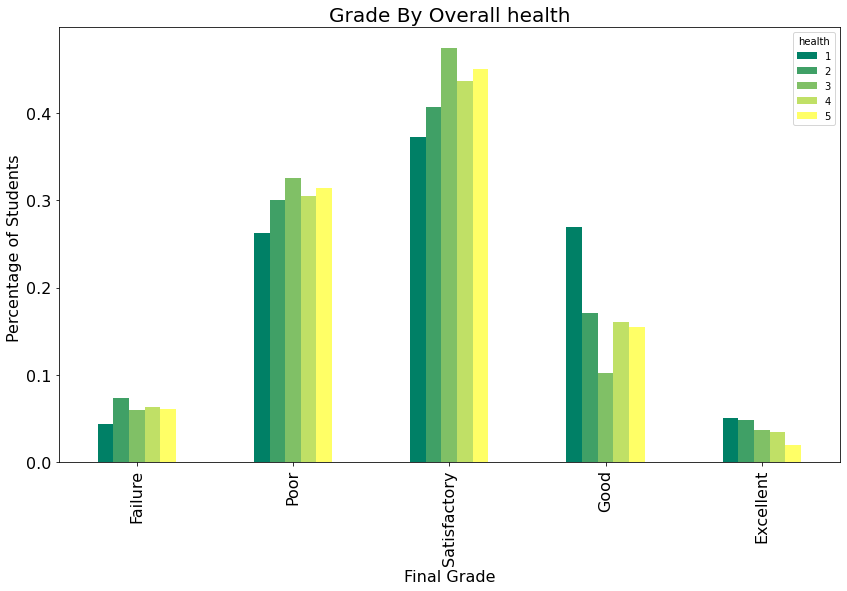

In [52]:
# health - current health status
health_index = pd.crosstab(index=data.FinalGrade, columns=data.health)
Overall_health_index = health_index.apply(perc).reindex(index)

Overall_health_index.plot.bar(colormap='summer',fontsize=16, figsize=(14,8))
plt.title('Grade By Overall health', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

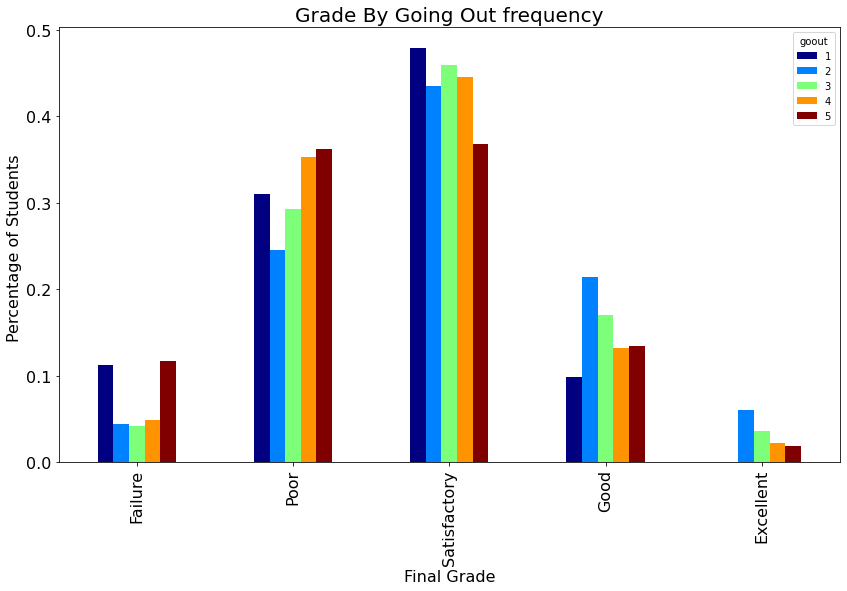

In [53]:
# goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
goout_index = pd.crosstab(index=data.FinalGrade, columns=data.goout)
Overall_goout_index = goout_index.apply(perc).reindex(index)
Overall_goout_index.plot.bar(colormap='jet',fontsize=16, figsize=(14,8))
plt.title('Grade By Going Out frequency', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()


In [54]:
#absences - number of school absences (numeric: from 0 to 93) 
data.head()
data['Regularity'] = 'na'
data.loc[(data.absences >= 0) & (data.absences <= 9), 'Regularity'] = 'Always Regular'
data.loc[(data.absences >= 10) & (data.absences <= 29), 'Regularity'] = 'Mostly Regular' 
data.loc[(data.absences >= 30) & (data.absences <= 49), 'Regularity'] = 'Regular' 
data.loc[(data.absences >= 50) & (data.absences <= 79), 'Regularity'] = 'Irregular' 
data.loc[(data.absences >= 80)& (data.absences <= 93), 'Regularity'] = 'Highly Irregular'
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,Satisfactory,Always Regular
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,Satisfactory,Always Regular
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,Satisfactory,Always Regular
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,Satisfactory,Always Regular
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,Satisfactory,Always Regular


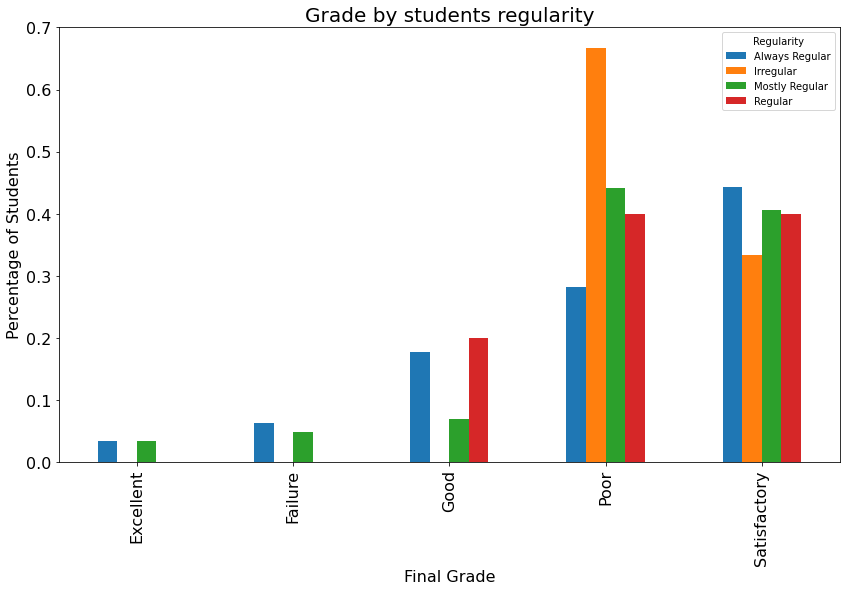

In [55]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
absences = pd.crosstab(index=data.FinalGrade, columns=data.Regularity)
absences = perc(absences)
absences.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by students regularity', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [56]:
data['Grade1'] = 'na'
data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 

data['Grade2'] = 'na'
data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,Satisfactory,Always Regular,Failure,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,Satisfactory,Always Regular,Poor,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory


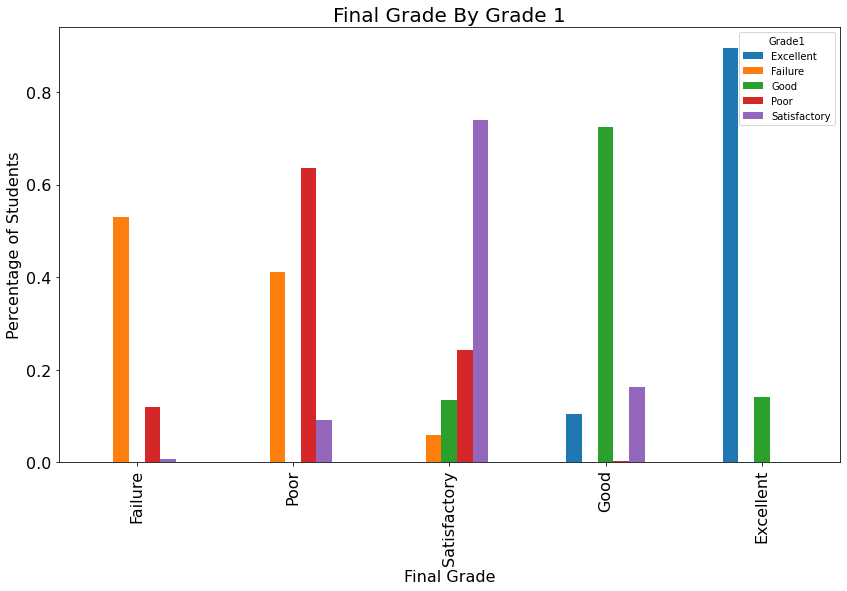

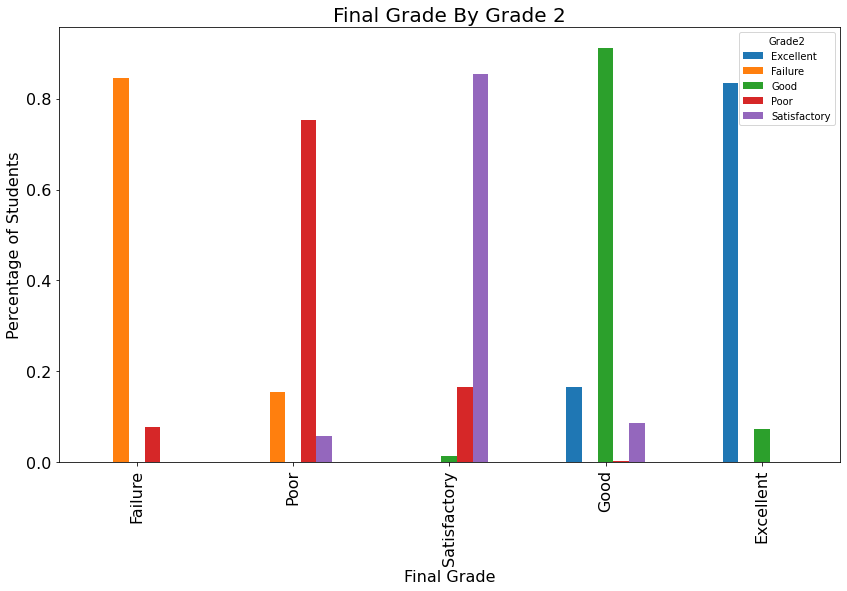

In [57]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Grade1_index = pd.crosstab(index=data.FinalGrade, columns=data.Grade1)
Grade1_index = Grade1_index.apply(perc).reindex(index)
Grade1_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Final Grade By Grade 1', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

index = ['Failure','Poor','Satisfactory','Good','Excellent']
Grade2_index = pd.crosstab(index=data.FinalGrade, columns=data.Grade2)
Grade2_index = Grade2_index.apply(perc).reindex(index)
Grade2_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Final Grade By Grade 2', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

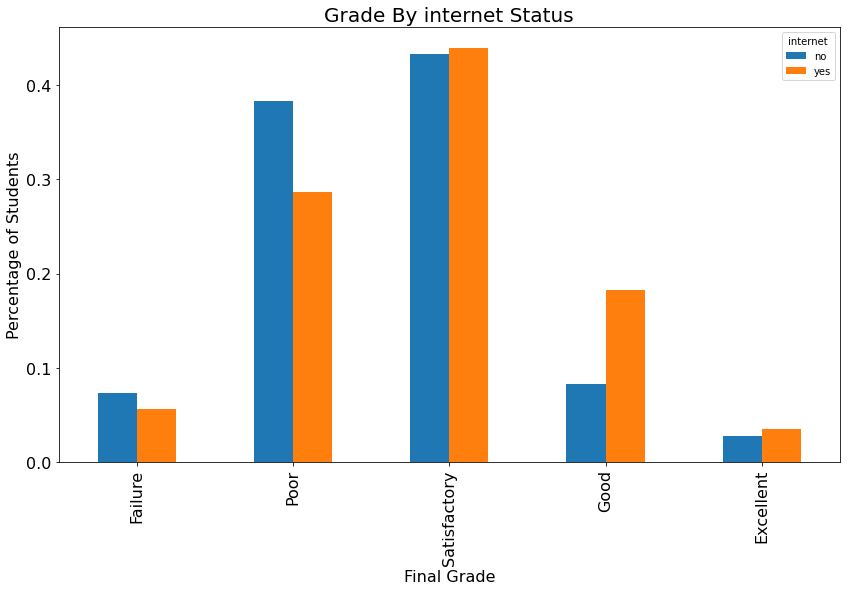

In [58]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
internet_index = pd.crosstab(index=data.FinalGrade, columns=data.internet)
internet_index = internet_index.apply(perc).reindex(index)
internet_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By internet Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

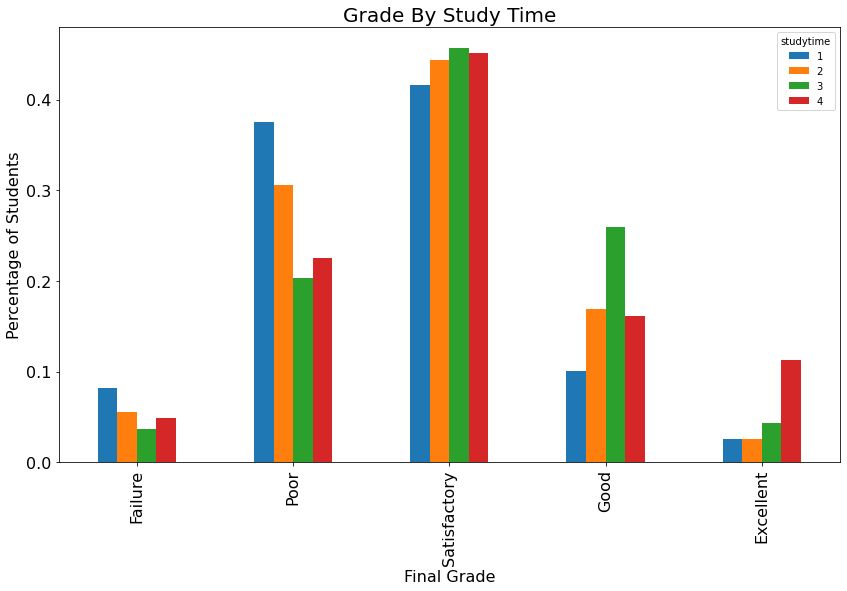

In [59]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
studytime_index = pd.crosstab(index=data.FinalGrade, columns=data.studytime)
studytime_index = studytime_index.apply(perc).reindex(index)
studytime_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Study Time', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

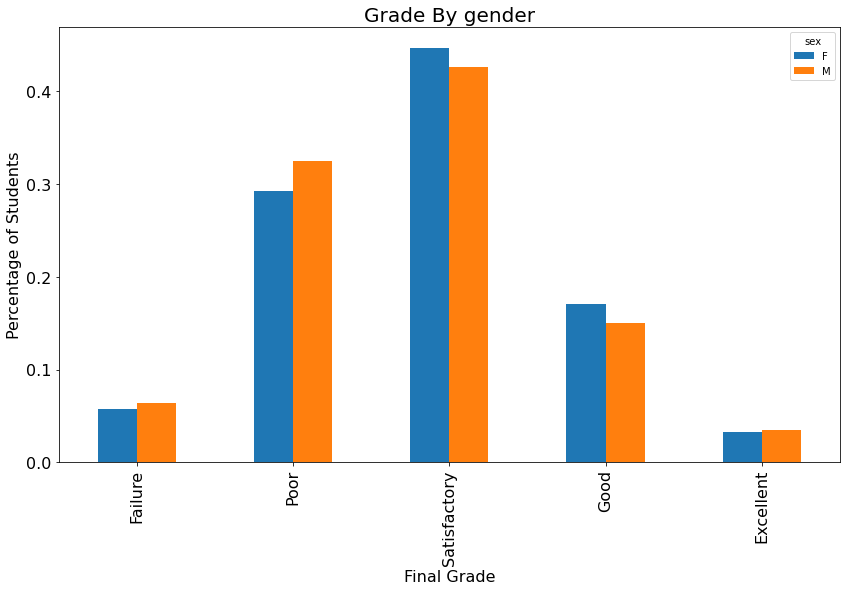

In [60]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
gender_index = pd.crosstab(index=data.FinalGrade, columns=data.sex)
gender_index = gender_index.apply(perc).reindex(index)
gender_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By gender', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

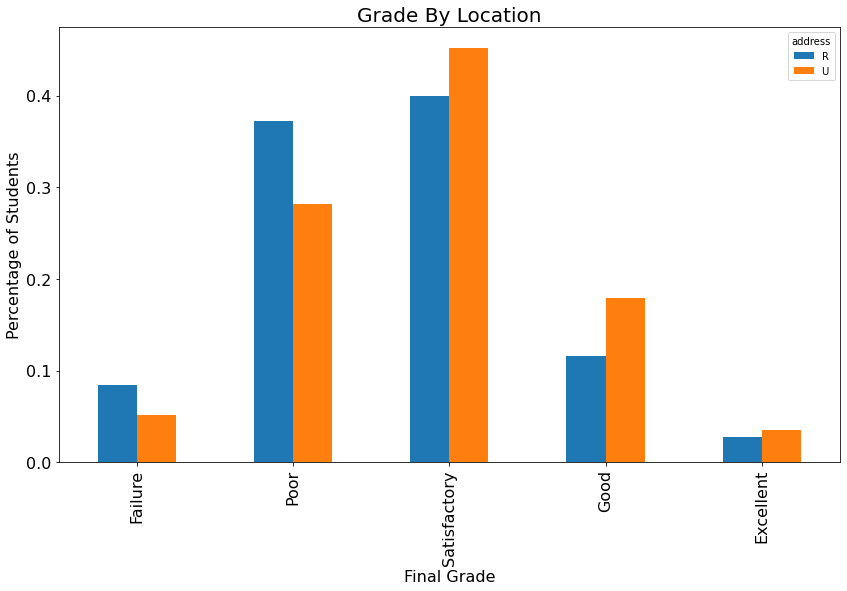

In [61]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Location_index = pd.crosstab(index=data.FinalGrade, columns=data.address)
Location_index = Location_index.apply(perc).reindex(index)
Location_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Location', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

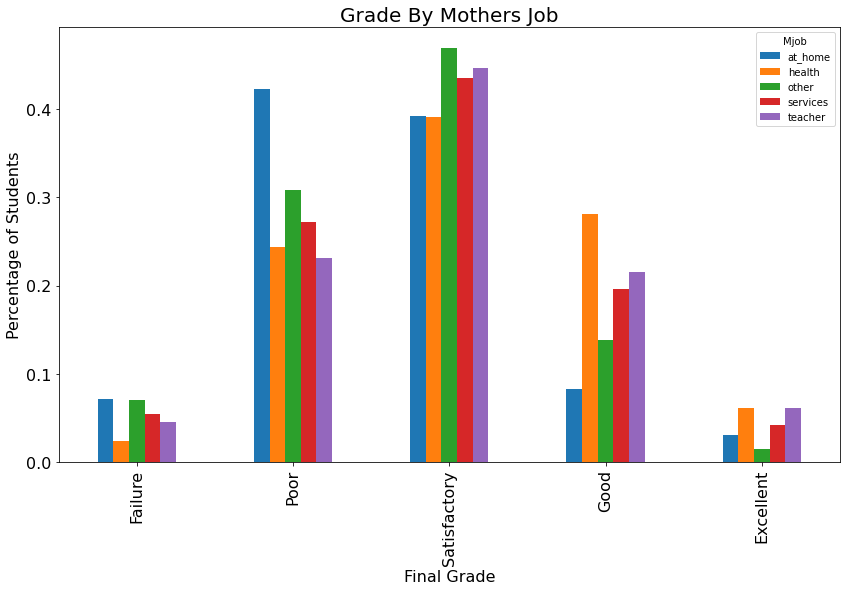

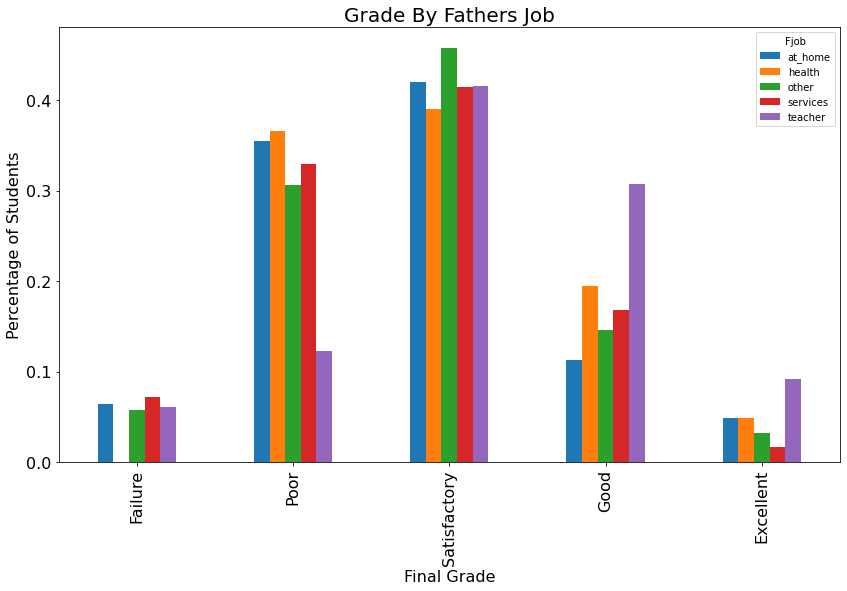

In [62]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Mothers_index = pd.crosstab(index=data.FinalGrade, columns=data.Mjob)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

index = ['Failure','Poor','Satisfactory','Good','Excellent']
Fathers_index = pd.crosstab(index=data.FinalGrade, columns=data.Fjob)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

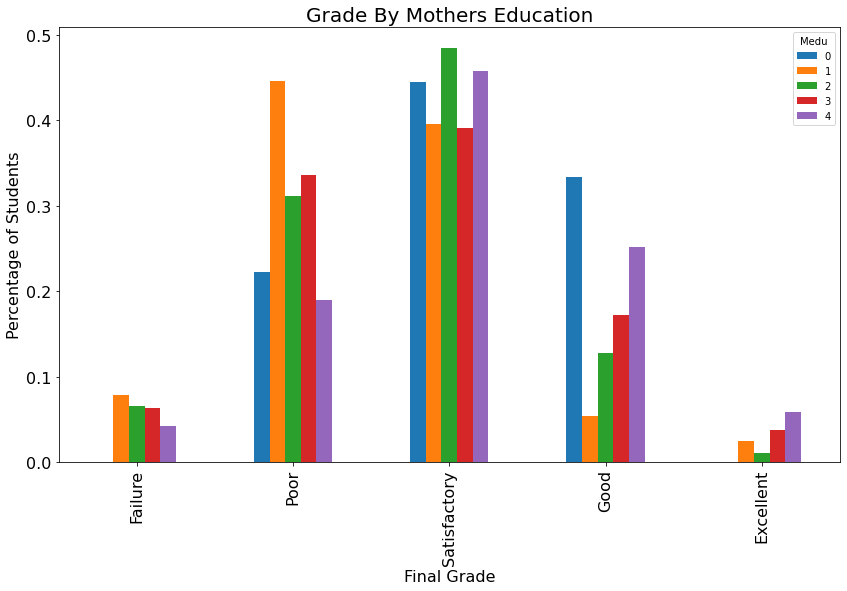

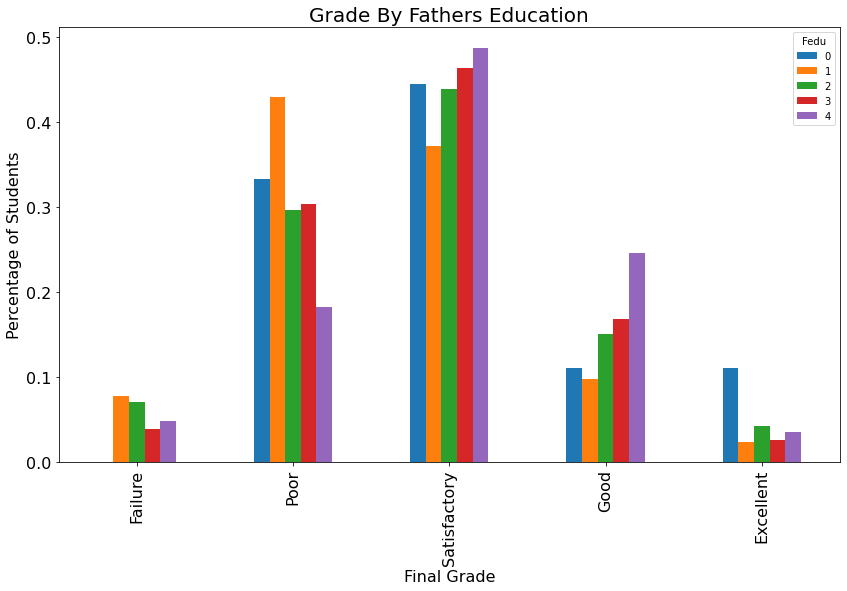

In [63]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Mothers_index = pd.crosstab(index=data.FinalGrade, columns=data.Medu)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

index = ['Failure','Poor','Satisfactory','Good','Excellent']
Fathers_index = pd.crosstab(index=data.FinalGrade, columns=data.Fedu)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()


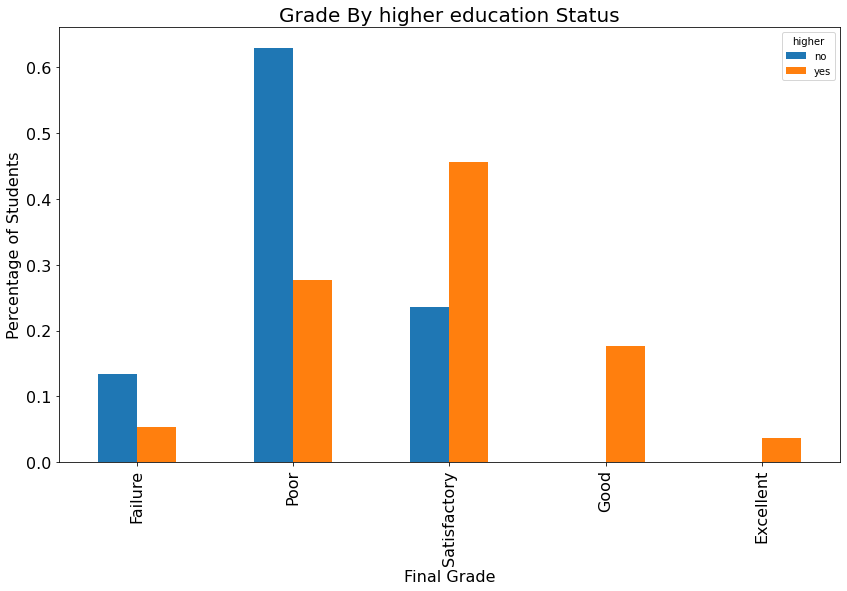

In [64]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
higher_index = pd.crosstab(index=data.FinalGrade, columns=data.higher)
higher_index = higher_index.apply(perc).reindex(index)
higher_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By higher education Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

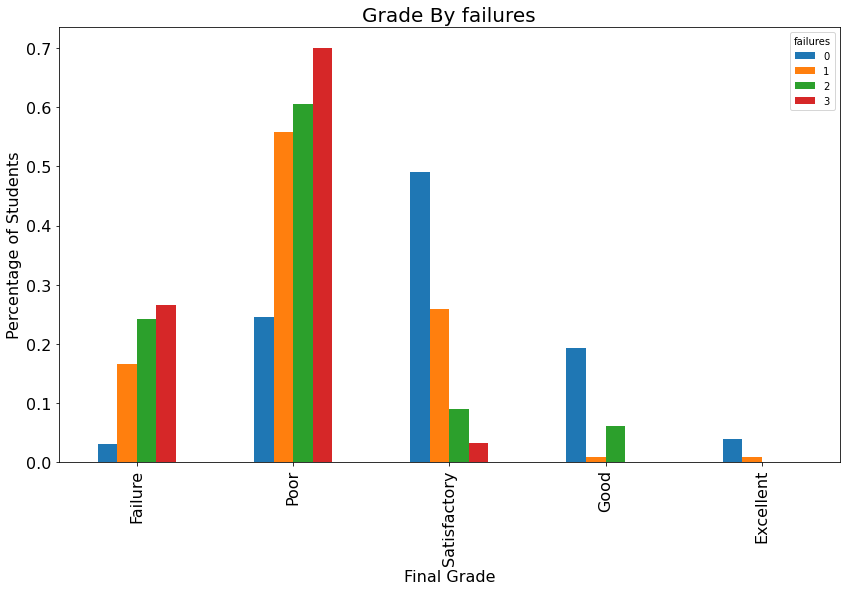

In [65]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.failures)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By failures', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

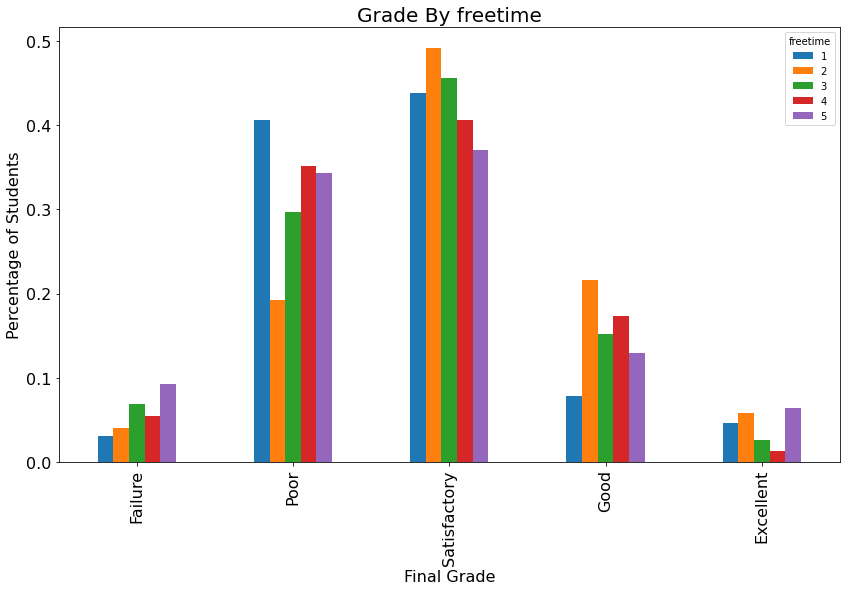

In [66]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.freetime)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By freetime', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [67]:
data.to_csv('features.csv', index=False)

# Model Development

In [68]:
train1 = pd.read_csv('features.csv')
train1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,Satisfactory,Always Regular,Failure,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,Satisfactory,Always Regular,Poor,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory


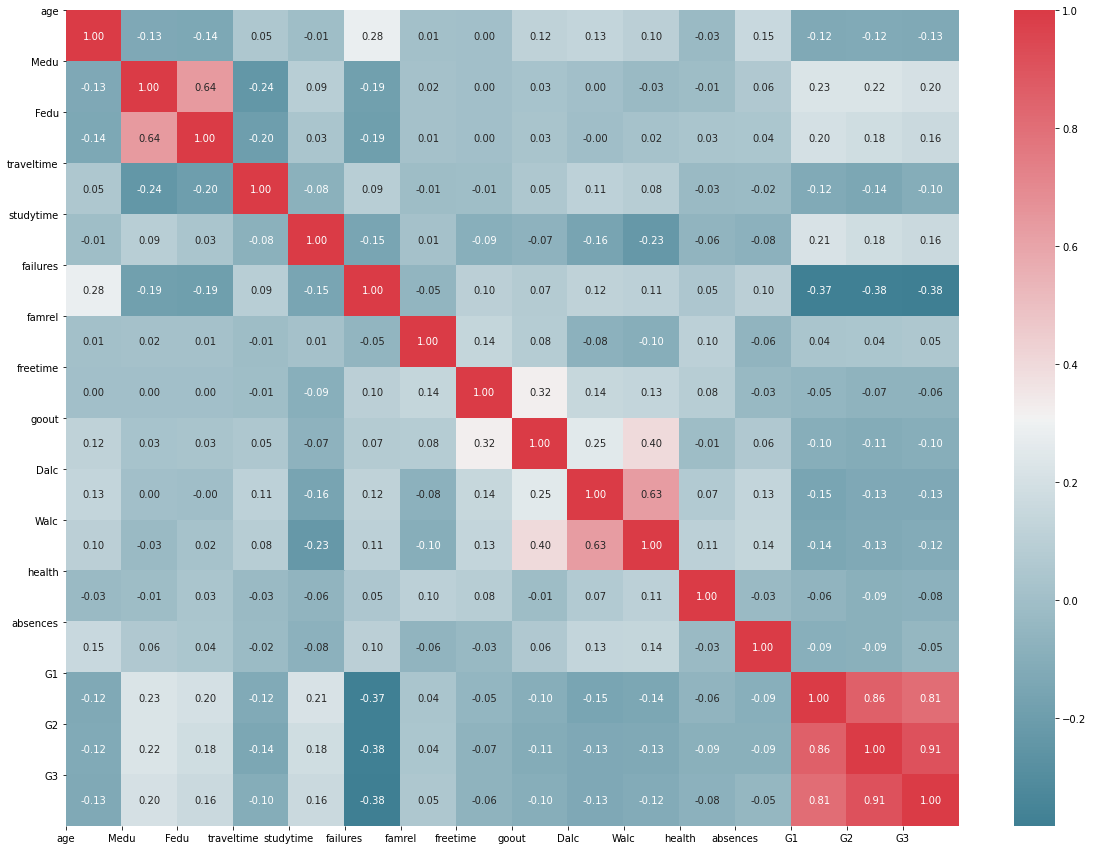

In [69]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

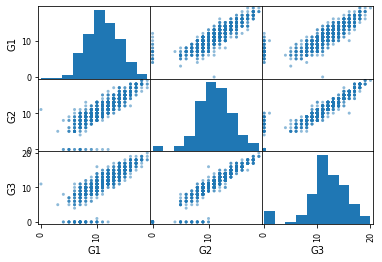

In [70]:
from pandas.plotting import scatter_matrix
grades = train1[['G1','G2','G3']]
scatter_matrix(grades)
plt.show()

In [71]:
train1 = train1.drop(labels=['FinalGrade','Fjob','Mjob','Pstatus','Regularity','Grade1','Grade2'],axis=1)
train1.head()

,school,sex,age,address,famsize,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,4,4,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,1,1,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,1,1,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,4,2,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,3,3,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese


# One hot Encoding

In [72]:
train1 = pd.get_dummies(train1)

In [73]:
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_Maths,subject_Portuguese
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1


In [74]:
req = train1

In [75]:
req = req.drop(labels=['G3'],axis=1)

In [76]:
X = req
y = train1['G3']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression :

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
regressor.intercept_

11.374124349988715

In [82]:
coeff_df = pd.DataFrame(regressor.coef_, req.columns, columns=['Coefficient'])
coeff_df["Coefficient"]=coeff_df["Coefficient"].apply(lambda x: float(round(x,5)))
coeff_df

,Coefficient
age,-4.207000e-02
Medu,-1.938000e-02
Fedu,5.850000e-03
traveltime,1.074000e-01
studytime,-4.319000e-02
failures,-1.207900e-01
famrel,1.009800e-01
freetime,-4.379000e-02
goout,6.655000e-02
Dalc,-6.740000e-03


In [83]:
y_pred = regressor.predict(X_test)

In [84]:
y_pred = y_pred.astype(int)
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
df

,Actual Score,Predicted Score
247,14,13
1014,10,9
766,13,13
892,12,11
97,12,12
...,...,...
1038,0,3
190,14,12
283,10,11
700,13,12


In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.167464114832536
Mean Squared Error: 2.8803827751196174
Root Mean Squared Error: 1.6971690473018937


# Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [87]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9502392344497608
Mean Squared Error: 2.0956937799043063
Root Mean Squared Error: 1.4476511250658102


In [88]:
feat_impdf=pd.DataFrame(list(zip(req,list(regressor.feature_importances_))),columns=["feature","score"])
feat_impdf

,feature,score
0,age,0.008328
1,Medu,0.002370
2,Fedu,0.006364
3,traveltime,0.004953
4,studytime,0.010182
5,failures,0.003287
6,famrel,0.006307
7,freetime,0.003498
8,goout,0.005867
9,Dalc,0.006043


In [89]:
y_pred = y_pred.astype(int)
rdf = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
rdf

,Actual Score,Predicted Score
247,14,13
1014,10,10
766,13,14
892,12,12
97,12,13
...,...,...
1038,0,0
190,14,12
283,10,11
700,13,13
